In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
X_valid = X_train[50000:]
Y_valid = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

print(X_train.shape)

(50000, 28, 28)


In [3]:
X_train, X_valid, X_test = X_train.reshape(-1, X_train[0].size), X_valid.reshape(-1, X_valid[0].size), X_test.reshape(-1, X_test[0].size)
print(X_train.shape)

(50000, 784)


In [4]:
X_train = X_train.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
from tensorflow.keras.models import Model
input_l=Input(shape=(784,))
encoding_1=Dense(256, activation='relu', activity_regularizer=l1(0.001))(input_l)
bottleneck=Dense(32, activation='relu', activity_regularizer=l1(0.001))(encoding_1)
decoding_1=Dense(256, activation='relu', activity_regularizer=l1(0.001))(bottleneck)
output_l=Dense(784, activation='sigmoid')(decoding_1)
autoencoder=Model(inputs=[input_l],outputs=[output_l])
encoder=Model(inputs=[input_l],outputs=[bottleneck])
encoded_input=Input(shape=(32,))
decoded_layer_2=autoencoder.layers[-2](encoded_input)
decoded=autoencoder.layers[-1](decoded_layer_2)
decoder=Model(inputs=[encoded_input],outputs=[decoded])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [6]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │           8,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 419,120 (1.60 MB)

 Trainable params: 419,120 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

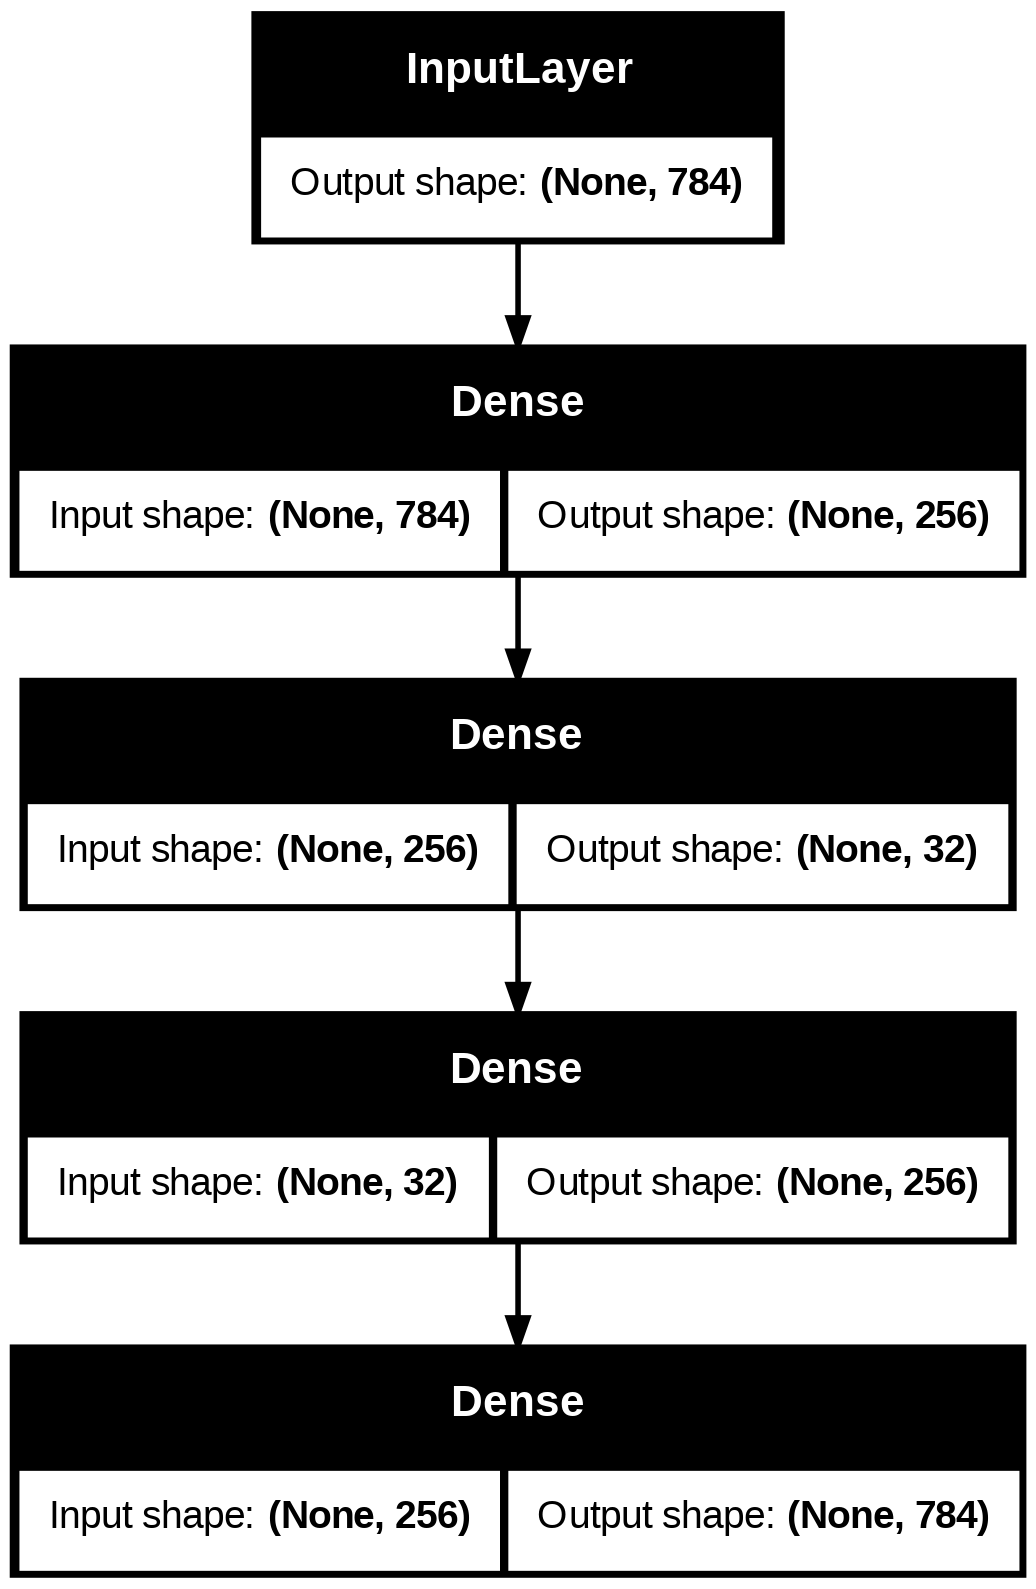

In [7]:
keras.utils.plot_model(autoencoder, show_shapes = True)

In [8]:
print(X_train.shape)
print(X_valid.shape)

(50000, 784)
(10000, 784)


In [9]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - loss: 1.8200 - val_loss: 0.6275
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6129 - val_loss: 0.5728
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5604 - val_loss: 0.5273
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.5172 - val_loss: 0.4895
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4805 - val_loss: 0.4579
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.4507 - val_loss: 0.4314
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.4251 - val_loss: 0.4090
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.4039 - val_loss: 0.3901
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.3855 - val_loss: 0.3741
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3704 - val_loss: 0.3604
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3572 - val_loss: 0.3486
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━

In [10]:
loss = autoencoder.evaluate(X_test, X_test)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2584
0.26406461000442505


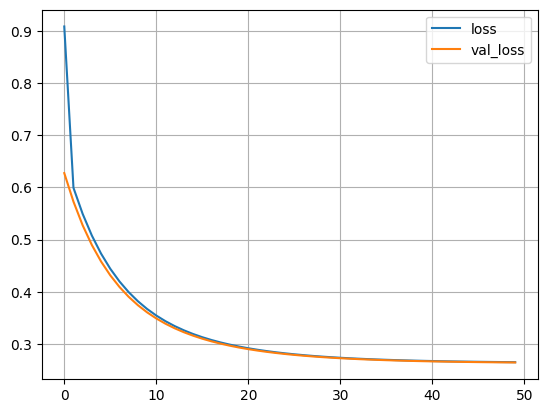

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot()
import matplotlib.pyplot as plt
plt.grid(True)
plt.show()

In [12]:
print(X_test[0].shape)

(784,)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


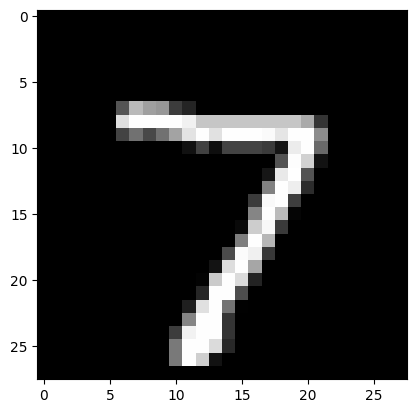

In [13]:
y = autoencoder.predict(X_test[0].reshape(1, -1))

plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.show()

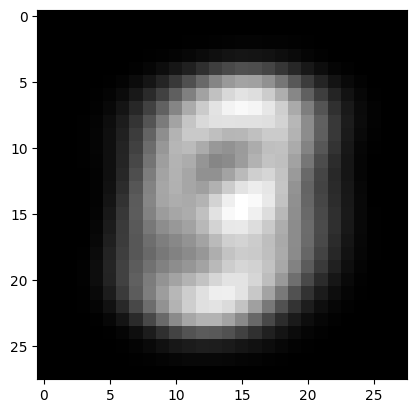

In [14]:
plt.imshow(y.reshape(28, 28), cmap = 'gray')
plt.show()